In [1]:
import sympy as sym

import numpy as np

import itertools

sym.init_printing()

In [2]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [3]:
import evol_dynamics

In [4]:
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

In [5]:
matplotlib.rc('font', **font)

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
from tqdm import tqdm

In [8]:
import pandas as pd

In [9]:
from scipy import stats

In [10]:
s_one = (0, 0, 0)
s_two = (1, 1, 0)

In [11]:
payoff_vector = np.array(evol_dynamics.donation_game(1, 3))

In [12]:
evol_dynamics.steady_state(s_two, s_one, delta=0.999) @ payoff_vector 

**Defining variables**

In [9]:
y_1, p_1, q_1 = sym.symbols("y_1, p_1, q_1")
y_2, p_2, q_2 = sym.symbols("y_2, p_2, q_2")

In [10]:
s_one = (y_1, p_1, q_1)
s_two = (y_2, p_2, q_2)

In [11]:
s_one

In [12]:
combinations = itertools.product([s_one, s_two], repeat=2)

In [13]:
list(combinations)

**Get expression using code**

In [14]:
d = sym.symbols("delta")

In [15]:
v_zero = evol_dynamics.expected_distribution_opening_round(s_one, s_two)

In [16]:
v_zero

In [17]:
M = evol_dynamics.markov_chain_for_reactive_strategies(s_one, s_two)

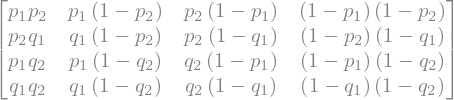

In [18]:
sym.Matrix(M)

In [19]:
inverse = sym.Matrix(np.identity(4) - d * M).inverse_ADJ()

In [20]:
expression = (1 - d) * sym.Matrix(v_zero).reshape(1, 4) @ inverse

**Check the written mathematics**

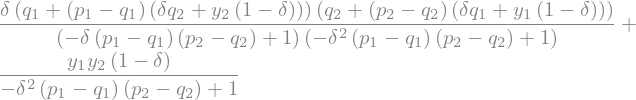

In [21]:
u_R = evol_dynamics.formulation.probability_being_in_state_R(s_one, s_two, d)
u_R

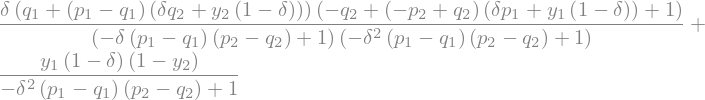

In [22]:
u_S = evol_dynamics.formulation.probability_being_in_state_S(s_one, s_two, d)
u_S

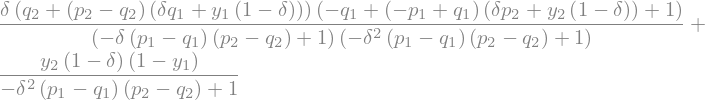

In [23]:
u_T = evol_dynamics.formulation.probability_being_in_state_T(s_one, s_two, d)
u_T

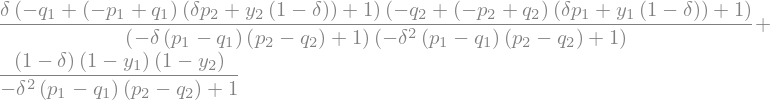

In [24]:
u_P = evol_dynamics.formulation.probability_being_in_state_P(s_one, s_two, d)
u_P

In [25]:
(u_R - expression[0]).simplify(), (u_S - expression[1]).factor()

In [26]:
(u_T - expression[2]).factor(), (u_P - expression[3]).factor()

**Check functions for analysis of ALLD into GTFT**

In [27]:
q = sym.symbols("q")

N, k = sym.symbols("N, k")

In [28]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

**States of Eq. (9) and (10)**

In [29]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, GTFT, d).factor()

In [30]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [31]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [32]:
evol_dynamics.formulation.probability_being_in_state_T(ALLD, GTFT, d).factor()

In [33]:
(
    evol_dynamics.formulation.probability_being_in_state_S(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_T(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_P(GTFT, GTFT, d).factor(),
)

In [34]:
evol_dynamics.formulation.probability_being_in_state_R(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_S(ALLD, GTFT, d).factor()

In [35]:
evol_dynamics.formulation.probability_being_in_state_T(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_P(ALLD, GTFT, d).factor()

**Simulations** - **Example in notes**

**Plotting simulation results**

In [132]:
import matplotlib.colors as colors

reds = matplotlib.cm.get_cmap("Reds")
blues = matplotlib.cm.get_cmap("Blues")

In [133]:
params = {"text.color" : "black",
          "xtick.color" : "black",
          "ytick.color" : "black"}

In [201]:
exp = pd.read_csv("../matlab/data/expected/clean_c_1_b_10_stochastic_0.csv")

In [202]:
ps, qs = [], []
for p, q, v in zip(exp["p"], exp["q"], exp["frequencies"]):
    for _ in range(int(v)):
        ps.append(p)
        qs.append(q)

In [203]:
stoch = pd.read_csv("../matlab/data/stochastic/clean_c_1_b_10_stochastic_1.csv")

In [204]:
stoch = stoch.drop_duplicates()

In [205]:
ps_stoch, qs_stoch = [], []
for p, q, v in zip(stoch["p"], stoch["q"], stoch["frequencies"]):
    for _ in range(int(v)):
        ps_stoch.append(p)
        qs_stoch.append(q)

**Cooperation rates**

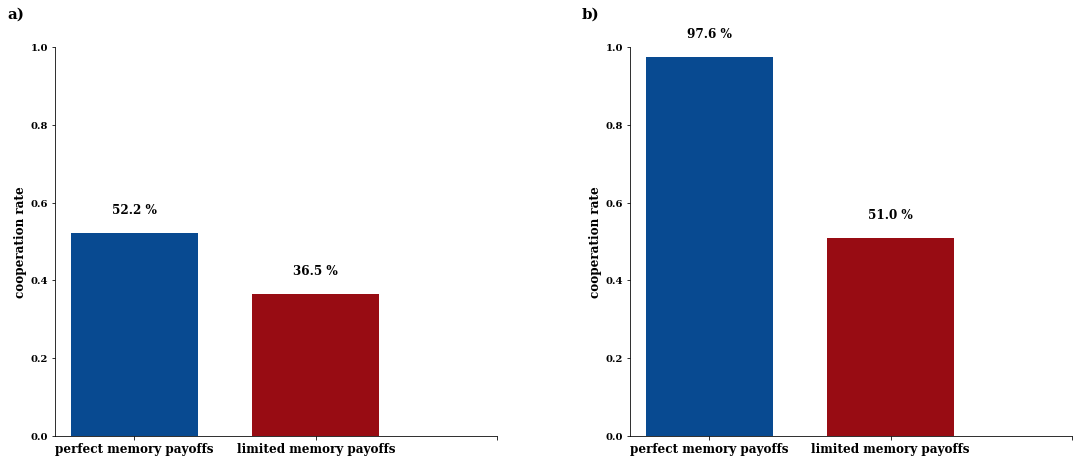

In [255]:
bars = ('perfect memory payoffs', 'limited memory payoffs')


fig, axes = plt.subplots(ncols=2, figsize=(15, 6.5));

for i, beta in enumerate([3, 10]):
    
    exp = pd.read_csv(f"../matlab/data/expected/clean_c_1_b_{beta}_stochastic_0.csv")
    stoch = pd.read_csv(f"../matlab/data/stochastic/clean_c_1_b_{beta}_stochastic_1.csv")
    
    height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
          for df in [exp, stoch]]

    x_pos = np.arange(len(bars))
    
    axes[i].bar([0, 0.1], height, width=0.07,  color=[blues(0.9), reds(0.9)])

    axes[i].set_ylabel("cooperation rate", weight="bold", fontsize=12);

    axes[i].set_ylim(0, 1);
    axes[i].set_xticks([0, 0.1, 0.2]);
    axes[i].set_xticklabels([bars[0], bars[1], ""], fontsize=12);

#     plt.xticks([0, 0.1], bars);

    for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
        ax.set_visible(False);

    for j, pos in enumerate([0, 0.1]):
        axes[i].text(pos,
              height[j] + 0.05,
              f"{round(height[j], 3) * 100} %",
              horizontalalignment='center',
              color="black",
              weight='bold',
              fontsize=12
          )

for ax, label in zip(axes, ["a)", "b)"]):    
    ax.text(-.07, max(height) + 0.1, label, fontsize=15)

plt.tight_layout();
plt.subplots_adjust(wspace=.3)

plt.savefig("../static/_cooperation_rates_expected_and_stochastic_for_donation_game.pdf")

In [257]:
heatmaps = []
extents = []

for i, beta in enumerate([3, 10]):
    
    exp = pd.read_csv(f"../matlab/data/expected/clean_c_1_b_{beta}_stochastic_0.csv")
    stoch = pd.read_csv(f"../matlab/data/stochastic/clean_c_1_b_{beta}_stochastic_1.csv")
    
    for df in [exp, stoch]:
        
        ps, qs = [], []
        for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
            for _ in range(int(v)):
                ps.append(p)
                qs.append(q)


        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        heatmaps.append(heatmap)
        extents.append(extent)

In [263]:
cmaps = [blues, reds]

In [272]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

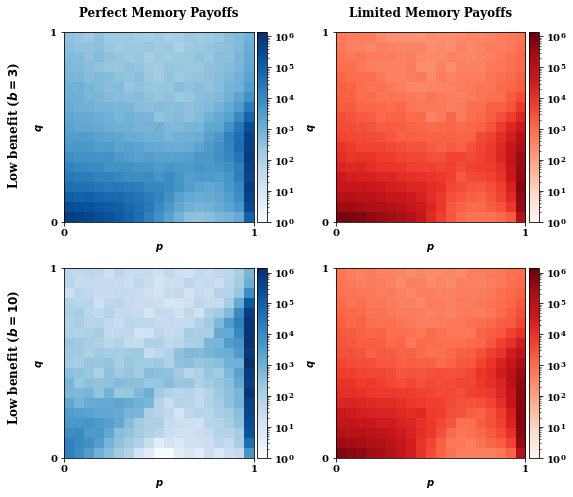

In [304]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 7))

for i, heatmap in enumerate(heatmaps):
    
    index = (int(i / 2), (i % 2))

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[(i % 2)],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")


axes[(0, 0)].set_title(r"Perfect Memory Payoffs", weight="bold", y=1.05);
axes[(0, 1)].set_title(r"Limited Memory Payoffs", weight="bold", y=1.05);

axes[(0, 0)].set_ylabel("$q$")

axes[(0, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=3$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

axes[(1, 0)].text(-0.3,
              0.2,
              "Low benefit ($b=10$)",
              color="black",
              rotation=90,
              weight='bold',
              fontsize=12,
          )

fig.tight_layout();

fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [306]:
min_

In [308]:
max_